In [107]:
# Importing necessary libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
import networkx as nx
import plotly.express as px
import plotly.graph_objects as go

In [108]:
# Load the dataset
mba_input = pd.read_excel('/kaggle/input/online-retail-for-market-basket-analysis/Online Retail.xlsx')

In [109]:
#Dataset
mba_input

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [110]:
# Display basic information about the dataset
print(mba_input.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None


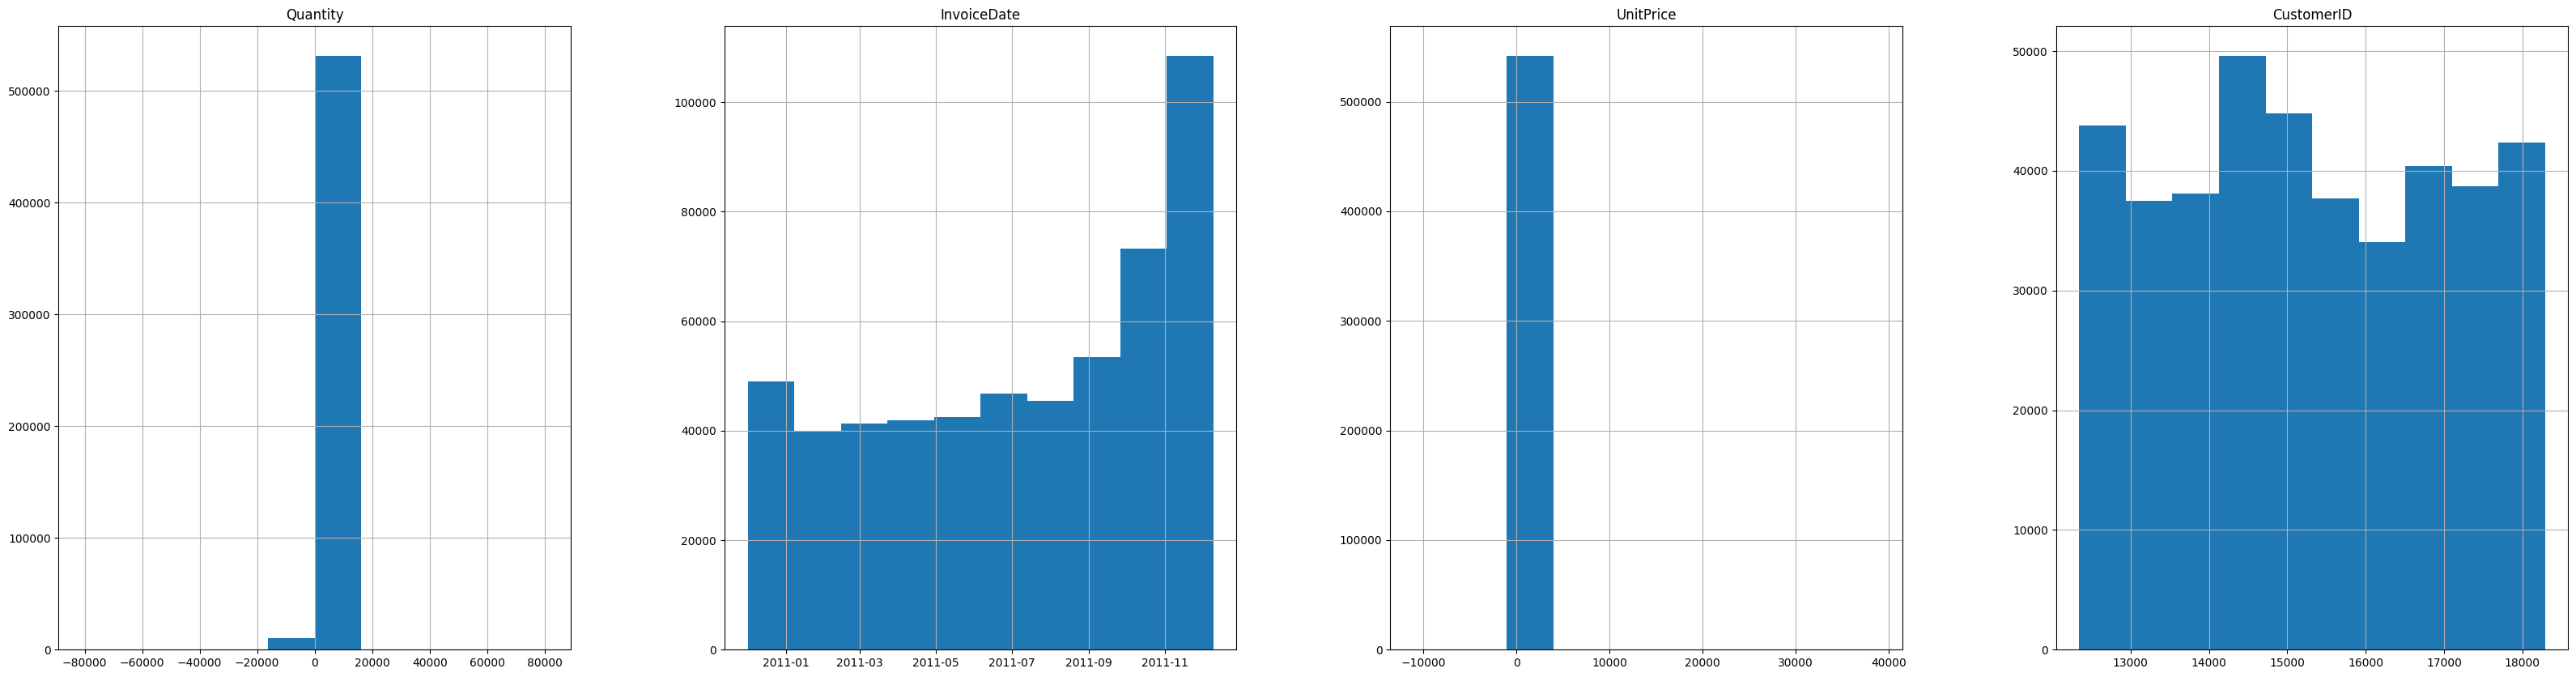

In [111]:
# Plotting histograms
mba_input.hist(figsize=(40,10), linewidth=5, layout=(1,4));

In [112]:
# Pre-processing steps
# Remove null values
mba_input = mba_input.dropna()
print(mba_input)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      

In [113]:
# Remove single transaction customers' data
mba_input = mba_input.groupby('CustomerID').filter(lambda x: len(x) > 1)
print(mba_input)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      

In [114]:
# Display information after preprocessing
print(mba_input.info())

<class 'pandas.core.frame.DataFrame'>
Index: 406750 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406750 non-null  object        
 1   StockCode    406750 non-null  object        
 2   Description  406750 non-null  object        
 3   Quantity     406750 non-null  int64         
 4   InvoiceDate  406750 non-null  datetime64[ns]
 5   UnitPrice    406750 non-null  float64       
 6   CustomerID   406750 non-null  float64       
 7   Country      406750 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB
None


In [115]:
# 60% of the remaining values are used as training data
training_data = mba_input.sample(frac=0.6, random_state=42)

In [116]:
# Display information about the training data
print(training_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 244050 entries, 340407 to 215387
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    244050 non-null  object        
 1   StockCode    244050 non-null  object        
 2   Description  244050 non-null  object        
 3   Quantity     244050 non-null  int64         
 4   InvoiceDate  244050 non-null  datetime64[ns]
 5   UnitPrice    244050 non-null  float64       
 6   CustomerID   244050 non-null  float64       
 7   Country      244050 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 16.8+ MB
None


In [117]:
#One-hot encoding using Pandas
data_encoded = pd.get_dummies(training_data)

In [118]:
# Convert all columns to boolean type
data_encoded = data_encoded.astype(bool)

In [119]:
# Apriori algorithm
frequent_itemsets = apriori(data_encoded, min_support=0.005, use_colnames=True)

In [120]:
# Association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)

In [121]:
# Display the frequent itemsets and association rules
print("Frequent Itemsets:")
print(frequent_itemsets)

Frequent Itemsets:
      support                                           itemsets
0    1.000000                                         (Quantity)
1    1.000000                                      (InvoiceDate)
2    0.999889                                        (UnitPrice)
3    1.000000                                       (CustomerID)
4    0.005114                                 (StockCode_85123A)
..        ...                                                ...
154  0.005097  (StockCode_85123A, Quantity, UnitPrice, Invoic...
155  0.005097  (StockCode_85123A, Quantity, CustomerID, Descr...
156  0.005097  (StockCode_85123A, Quantity, CustomerID, UnitP...
157  0.005097  (StockCode_85123A, CustomerID, UnitPrice, Invo...
158  0.005097  (StockCode_85123A, Quantity, CustomerID, UnitP...

[159 rows x 2 columns]


In [122]:
print("\nAssociation Rules:")
print(rules)


Association Rules:
                                           antecedents  \
0                                        (InvoiceDate)   
1                                           (Quantity)   
2                                          (UnitPrice)   
3                                           (Quantity)   
4                                           (Quantity)   
..                                                 ...   
857  (Description_WHITE HANGING HEART T-LIGHT HOLDE...   
858  (UnitPrice, Description_WHITE HANGING HEART T-...   
859  (Description_WHITE HANGING HEART T-LIGHT HOLDE...   
860                                 (StockCode_85123A)   
861   (Description_WHITE HANGING HEART T-LIGHT HOLDER)   

                                           consequents  antecedent support  \
0                                           (Quantity)            1.000000   
1                                        (InvoiceDate)            1.000000   
2                                           (Quan

In [123]:
# Display the results in the desired format
print("Antecedents\t\tConsequents\t\tSupport\t\tConfidence\tLift")
for _, row in rules.iterrows():
    antecedents = ', '.join(row['antecedents'])
    consequents = ', '.join(row['consequents'])
    support = round(row['support'], 5)
    confidence = round(row['confidence'], 5)
    lift = round(row['lift'], 5)
    print(f"{antecedents}\t\t{consequents}\t\t{support}\t\t{confidence}\t\t{lift}")


Antecedents		Consequents		Support		Confidence	Lift
InvoiceDate		Quantity		1.0		1.0		1.0
Quantity		InvoiceDate		1.0		1.0		1.0
UnitPrice		Quantity		0.99989		1.0		1.0
Quantity		UnitPrice		0.99989		0.99989		1.0
Quantity		CustomerID		1.0		1.0		1.0
CustomerID		Quantity		1.0		1.0		1.0
StockCode_85123A		Quantity		0.00511		1.0		1.0
Description_WHITE HANGING HEART T-LIGHT HOLDER		Quantity		0.0051		1.0		1.0
Country_EIRE		Quantity		0.01852		1.0		1.0
Country_France		Quantity		0.02055		1.0		1.0
Country_Germany		Quantity		0.02316		1.0		1.0
Country_Netherlands		Quantity		0.00592		1.0		1.0
Country_Spain		Quantity		0.0063		1.0		1.0
Country_United Kingdom		Quantity		0.88979		1.0		1.0
Quantity		Country_United Kingdom		0.88979		0.88979		1.0
UnitPrice		InvoiceDate		0.99989		1.0		1.0
InvoiceDate		UnitPrice		0.99989		0.99989		1.0
InvoiceDate		CustomerID		1.0		1.0		1.0
CustomerID		InvoiceDate		1.0		1.0		1.0
StockCode_85123A		InvoiceDate		0.00511		1.0		1.0
Description_WHITE HANGING HEART T-LIGHT HOLDER		Invoice

In [124]:
# Find and print minimum and maximum values for support, lift, and confidence
min_sup = frequent_itemsets['support'].min()
max_sup = frequent_itemsets['support'].max()

min_lift = rules['lift'].min()
max_lift = rules['lift'].max()

min_conf = rules['confidence'].min()
max_conf = rules['confidence'].max()

# Display the results
print(f"Minimum support is {min_sup:.5f}")
print(f"Maximum support is {max_sup:.5f}")

print(f"Minimum lift is {min_lift:.5f}")
print(f"Maximum lift is {max_lift:.5f}")

print(f"Minimum confidence is {min_conf:.5f}")
print(f"Maximum confidence is {max_conf:.5f}")

Minimum support is 0.00510
Maximum support is 1.00000
Minimum lift is 0.99942
Maximum lift is 195.55288
Minimum confidence is 0.88973
Maximum confidence is 1.00000


In [125]:
# Find the relationships between minimum and maximum values
min_support_rule = rules[rules['support'] == min_support].iloc[0]
max_support_rule = rules[rules['support'] == max_support].iloc[0]

min_lift_rule = rules[rules['lift'] == min_lift].iloc[0]
max_lift_rule = rules[rules['lift'] == max_lift].iloc[0]

min_confidence_rule = rules[rules['confidence'] == min_confidence].iloc[0]
max_confidence_rule = rules[rules['confidence'] == max_confidence].iloc[0]

# Display the relationships
print(f"Minimum Support is between '{min_support_rule['antecedents']}' and '{min_support_rule['consequents']}'")
print(f"Maximum Support is between '{max_support_rule['antecedents']}' and '{max_support_rule['consequents']}'")

print(f"Minimum Lift is between '{min_lift_rule['antecedents']}' and '{min_lift_rule['consequents']}'")
print(f"Maximum Lift is between '{max_lift_rule['antecedents']}' and '{max_lift_rule['consequents']}'")

print(f"Minimum Confidence is between '{min_confidence_rule['antecedents']}' and '{min_confidence_rule['consequents']}'")
print(f"Maximum Confidence is between '{max_confidence_rule['antecedents']}' and '{max_confidence_rule['consequents']}'")


Minimum Support is between 'frozenset({'Description_WHITE HANGING HEART T-LIGHT HOLDER'})' and 'frozenset({'Quantity'})'
Maximum Support is between 'frozenset({'InvoiceDate'})' and 'frozenset({'Quantity'})'
Minimum Lift is between 'frozenset({'Country_Netherlands'})' and 'frozenset({'UnitPrice'})'
Maximum Lift is between 'frozenset({'Description_WHITE HANGING HEART T-LIGHT HOLDER'})' and 'frozenset({'StockCode_85123A'})'
Minimum Confidence is between 'frozenset({'Quantity'})' and 'frozenset({'UnitPrice', 'Country_United Kingdom'})'
Maximum Confidence is between 'frozenset({'InvoiceDate'})' and 'frozenset({'Quantity'})'
